In [7]:
import numpy as np
from keras.losses import mean_squared_error
import tensorflow as tf

In [8]:
def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))


def sigmoid_derivative(x):
    return x * (1.0 - x)

In [9]:
class NeuralNetwork:
    def __init__(self, x, y):
        self.input = x
        self.weights1 = np.random.rand(self.input.shape[1], 4)
        self.weights2 = np.random.rand(4, 1)
        self.y = y
        self.output = np.zeros(self.y.shape)
        self.losses = []
        self.tf_session = tf.Session()

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))
        rms = self.tf_session.run(mean_squared_error(nn.output, y))
        self.losses.append(rms.mean())

    def backprop(self):
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        d_weights2 = np.dot(self.layer1.T, (2 * (self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T, (np.dot(2 * (self.y - self.output) * sigmoid_derivative(self.output),
                                                  self.weights2.T) * sigmoid_derivative(self.layer1)))

        # update the weights with the derivative (slope) of the loss function
        self.weights1 += d_weights1
        self.weights2 += d_weights2

In [10]:
    X = np.array([[0, 0, 1],
                  [0, 1, 1],
                  [1, 0, 1],
                  [1, 1, 1]])
    y = np.array([[0], [1], [1], [0]])
    nn = NeuralNetwork(X, y)

    for i in range(1500):
        nn.feedforward()
        nn.backprop()

    print(nn.output)

[[0.01413649]
 [0.97945525]
 [0.97890334]
 [0.0231201 ]]


In [11]:
import matplotlib.pyplot as  plt
%matplotlib inline

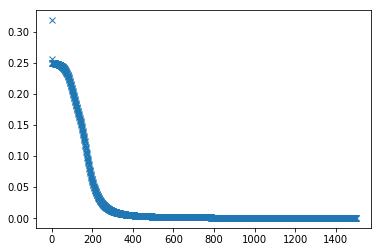

In [14]:
plt.plot(nn.losses, 'x')